# Basic Data Analysis 
## of Indian Logistics Quality

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 
import scipy.cluster.hierarchy as sch


Reading the data from the csv file :

In [28]:
states_data = pd.read_csv('Data/state_log.csv')

# Removing final coloumn of the data for better analysis of data
sd_final_score = states_data['Final Score']
states_data = states_data.drop(columns = 'Final Score')

states_data.head(10)

,State wise scores of individual parameters,Quality of Road Infrastructure,Quality of Rail Infrastructure,Quality of Multi-Modal Terminal Infrastructure,Quality of Unimodal Terminal Infrastructure,Quality ofWarehousing Infrastructure,Quality of Logistics Services,Capability of Logistics Service Providers,Reasonableness of Road Freight Rates,Reasonableness of Prices of Terminal Services,...,Availability of Mobile/ Internet Connectivity,Safety and Security during Transportation,Safety and Security at Terminals,Extent of Facilitation,Ease of Obtaining all Approvals,Efficiency of Regulatory,Range scaled Ease of Doing Business ranks,Trade Infrastructure for Export Scheme outlay,States logistics enabling initiatives,Assessment of variables of logistics ease
0,Gujarat,3.85,3.62,3.79,3.50,3.60,3.71,3.64,2.36,2.35,...,3.53,3.61,3.72,3.41,3.46,3.37,2,1,5,3.11
1,Haryana,3.68,3.67,3.78,3.45,3.74,3.69,3.80,2.65,2.61,...,3.59,3.62,3.74,3.32,3.19,3.38,3,1,1,3.44
2,Punjab,3.88,3.91,3.98,3.63,3.72,3.89,3.87,2.74,2.75,...,3.89,3.86,3.88,3.31,3.28,3.22,3,1,3,3.78
3,TamilNadu,3.68,3.30,3.49,3.18,3.52,3.67,3.72,2.54,2.62,...,3.69,3.75,3.74,3.13,3.19,3.19,2,5,2,3.44
4,Maharashtra,3.40,3.45,3.50,3.31,3.51,3.68,3.66,2.23,2.22,...,3.50,3.54,3.62,3.18,3.22,3.19,2,2,4,3.22
5,UttarPradesh,3.47,3.50,3.45,3.32,3.23,3.45,3.47,2.53,2.53,...,3.53,3.26,3.57,3.22,2.95,3.29,5,1,5,3.89
6,Odisha,3.28,2.97,3.28,2.91,2.81,3.52,3.49,2.07,2.35,...,3.62,3.04,3.51,3.17,3.03,2.95,1,1,2,3.67
7,Karnataka,3.51,3.33,3.41,3.14,3.50,3.52,3.52,2.42,2.49,...,3.42,3.70,3.74,3.07,3.07,3.07,3,2,5,3.33
8,AndhraPradesh,3.59,3.26,3.38,2.92,3.27,3.55,3.50,2.35,2.47,...,3.60,3.61,3.78,2.95,2.94,2.90,5,5,3,3.22
9,Telangana,3.48,3.14,3.47,2.94,3.21,3.52,3.56,2.31,2.41,...,3.72,3.82,3.92,2.94,2.95,2.95,5,1,5,3.00


In [29]:
states_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 22 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   State wise scores of individual parameters        31 non-null     object 
 1   Quality of Road Infrastructure                    31 non-null     float64
 2   Quality of Rail Infrastructure                    31 non-null     float64
 3   Quality of Multi-Modal Terminal Infrastructure    31 non-null     float64
 4   Quality of Unimodal Terminal Infrastructure       31 non-null     float64
 5   Quality ofWarehousing Infrastructure              31 non-null     float64
 6   Quality of Logistics Services                     31 non-null     float64
 7   Capability of Logistics Service Providers         31 non-null     float64
 8   Reasonableness of Road Freight Rates              31 non-null     float64
 9   Reasonableness of Price

In [30]:
states_data.describe()

,Quality of Road Infrastructure,Quality of Rail Infrastructure,Quality of Multi-Modal Terminal Infrastructure,Quality of Unimodal Terminal Infrastructure,Quality ofWarehousing Infrastructure,Quality of Logistics Services,Capability of Logistics Service Providers,Reasonableness of Road Freight Rates,Reasonableness of Prices of Terminal Services,Timeliness of Cargo Delivery (Transportation),...,Availability of Mobile/ Internet Connectivity,Safety and Security during Transportation,Safety and Security at Terminals,Extent of Facilitation,Ease of Obtaining all Approvals,Efficiency of Regulatory,Range scaled Ease of Doing Business ranks,Trade Infrastructure for Export Scheme outlay,States logistics enabling initiatives,Assessment of variables of logistics ease
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,...,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,3.041613,2.881935,2.917742,2.822258,2.917742,3.041613,3.105161,2.156452,2.239677,3.016129,...,3.101613,3.114516,3.277742,2.745484,2.739032,2.802258,2.548387,1.967742,3.225806,3.121613
std,0.603374,0.661521,0.677828,0.479678,0.542714,0.622613,0.594849,0.446964,0.403745,0.567678,...,0.597395,0.558031,0.513885,0.491500,0.496248,0.458095,1.501970,1.277599,1.257237,0.505260
min,1.930000,1.500000,1.530000,1.940000,1.920000,1.870000,1.780000,1.270000,1.430000,1.870000,...,2.000000,2.070000,2.000000,1.840000,1.820000,1.680000,1.000000,1.000000,1.000000,2.220000
25%,2.550000,2.295000,2.420000,2.500000,2.455000,2.640000,2.705000,1.830000,1.930000,2.650000,...,2.665000,2.610000,2.880000,2.305000,2.320000,2.455000,1.000000,1.000000,2.000000,2.670000
50%,3.070000,3.020000,3.130000,2.920000,2.900000,3.230000,3.380000,2.250000,2.350000,3.180000,...,3.300000,3.210000,3.410000,2.940000,2.940000,2.950000,2.000000,1.000000,3.000000,3.220000
75%,3.495000,3.355000,3.430000,3.185000,3.360000,3.530000,3.515000,2.495000,2.580000,3.480000,...,3.575000,3.610000,3.710000,3.175000,3.170000,3.185000,3.000000,3.000000,4.000000,3.500000
max,3.880000,3.910000,3.980000,3.630000,3.740000,3.890000,3.870000,2.780000,2.750000,3.700000,...,3.890000,3.880000,3.920000,3.410000,3.460000,3.380000,5.000000,5.000000,5.000000,3.890000


Converting all the spaces in the column names with spaces into underscores:

In [31]:
states_data.columns = [c.replace(' ','_') for c in states_data.columns]

### Comparision between frieight prices and terminal prices:
The reasonability of freight and Terminal prices are listed in the data, though which we can determine their cost difference in percentage 

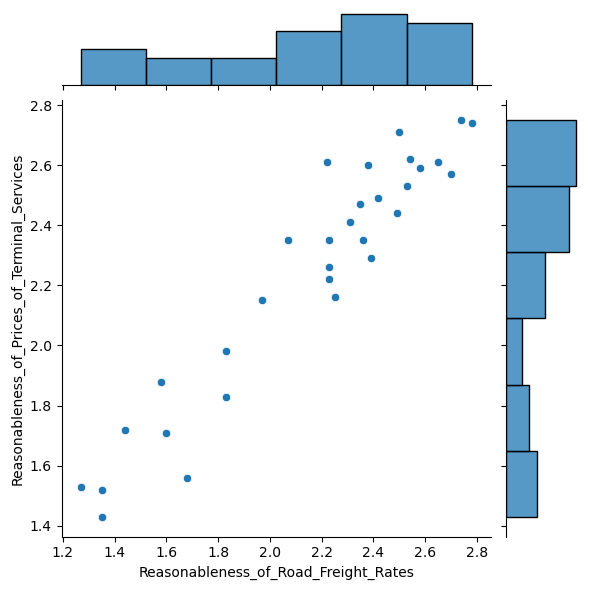

In [36]:
sns.jointplot(x = 'Reasonableness_of_Road_Freight_Rates', y = 'Reasonableness_of_Prices_of_Terminal_Services',data = states_data,)

In [37]:
freight_rate = states_data.Reasonableness_of_Road_Freight_Rates.median()
terminal_rate = states_data.Reasonableness_of_Prices_of_Terminal_Services.median()

perc_increase = ((terminal_rate/freight_rate)-1)*100
print(round(perc_increase,2))

4.44


There is a net *4.44%* increase in the cost of **terminal** price when compared to **frieght** price

### But,
The rating produced is from a scale of 1 to 5 and the rating of the fairness of price in both the sectors are **below 2.5**

Indicating a need for decrease in the price of logistics for increasing the ease of business